In [1]:
import pandas as pd
import numpy as np



In [4]:

dt = pd.read_csv('./snp.csv')

In [8]:
dt = dt[['Date', 'SnP']]

In [10]:
dt = dt.set_index('Date')

In [12]:
final_df = dt

In [17]:
final_df.index = pd.to_datetime(final_df.index)

In [18]:
final_df.index = final_df.index.to_period('M').to_timestamp()


In [21]:
final_df.columns = ['Price']

In [47]:

# Given bear markets
bear_markets = {
#     '1st bear market (1928-1932)': {
#         'full': [1929,1930,1931],
#         'partial': [1928,1932]
#     },
#     '2nd bear market (1936-1938)': {
#         'full': [1937],
#         'partial': [1936,1938]
#     },
#     '3rd bear market (1945-1947)': {
#         'full': [1946],
#         'partial': [1945,1947]
#     },
#     '4th bear market (1961-1963)': {
#         'full': [1962],
#         'partial': [1961,1963]
#     },
#     '5th bear market (1967-1970)': {
#         'full': [1968,1969],
#         'partial': [1967,1970]
#     },
#     '6th bear market (1972-1975)': {
#         'full': [1973, 1974],
#         'partial': [1972, 1975]
#     },
#     '7th bear market (1999-2003)': {
#         'full': [2000,2001,2002],
#         'partial': [1999,2003]
#     },
#     '8th bear market (2006-2008)': {
#         'full': [2007,2008],
#         'partial': [2006,2009]
#     },
    '9th bear market (2018-2019)': {
        'full': [2019],
        'partial': [2018]
    }
}
# Iterate over bear markets
for name, periods in bear_markets.items():
    
    full_years = pd.date_range(start=f'{min(periods["full"])}-01-01', end=f'{max(periods["full"])}-12-31', freq='M')
    full_years = full_years.to_period('M').to_timestamp()
    partial_years = pd.date_range(start=f'{min(periods["partial"])}-01-01', end=f'{max(periods["partial"])}-12-31', freq='M')
    partial_years = partial_years.to_period('M').to_timestamp()
    # Get market data for the bear market period
    market_data = final_df[final_df.index.isin(full_years.union(partial_years))]
    # Ensure the market data for the period is not empty
    if not market_data.empty:
        # Calculate peak-to-trough decline (percentage), peak-to-trough duration (months), and peak and trough months (date)
        
        peak_price = market_data['Price'].max()
        trough_price = market_data['Price'].min()

        peak_month = market_data['Price'].idxmax()
        trough_month = market_data['Price'].idxmin()

        if 2020 in periods['partial']:
            
            market_data = final_df[final_df.index.isin(full_years.union(partial_years))]
            market_data = market_data[:-5]
            peak_price = market_data['Price'].max()
            trough_price = market_data['Price'].min()

            peak_month = market_data['Price'].idxmax()
            trough_month = market_data['Price'].idxmin()

        
        decline = ((peak_price - trough_price) / peak_price) * 100
        duration = (trough_month - peak_month).days // 30

        print(f"{name}:")
        print(f"Peak-to-trough decline (percentage): {decline:.2f}%")
        print(f"Peak-to-trough duration (months): {duration}")
        print(f"Peak month (date): {peak_month}")
        print(f"Trough month (date): {trough_month}\n")
    else:
        print(f"No data available for {name}")


9th bear market (2018-2019):
Peak-to-trough decline (percentage): 20.19%
Peak-to-trough duration (months): -12
Peak month (date): 2019-12-01 00:00:00
Trough month (date): 2019-01-01 00:00:00



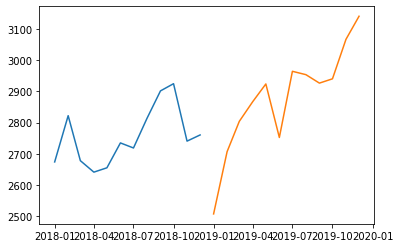

In [48]:

from matplotlib import pyplot as plt
for i in range(2018,2020):
    plt.plot(final_df['{}-01-01'.format(i):'{}-12-01'.format(i)])
plt.show()
plt.close()

In [31]:
ret = np.log(final_df / final_df.shift(1))
ret.iloc[0] = 0
ret.index = ret.index.to_period('M').to_timestamp()

In [32]:
dt_final = pd.DataFrame()
dt_final['Mkt'] = ret['1980-01':'2022-12-01']

In [33]:
rf = pd.read_csv('./risk_free.csv')
rf['RF'] = rf['RF'].astype('float')
rf['RF'] = rf['RF'] / 100

In [34]:
rf.set_index('Date', inplace=True)
rf.index = pd.to_datetime(rf.index)
rf = rf.sort_values(by='Date')

In [35]:
rf.index = rf.index.to_period('M').to_timestamp()
dt_final.index = dt_final.index.to_period('M').to_timestamp()
rf = rf['1980-01-01':'2022-12-01']

In [36]:
dt_final = pd.concat([dt_final,rf],1)

<ipython-input-36-61d48d1d095d>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  dt_final = pd.concat([dt_final,rf],1)


In [37]:
# https://fred.stlouisfed.org/series/INTDSRKRM193N

In [38]:
CPI = pd.read_csv('./CPI.csv')
CPI = CPI.set_index('Date')
CPI.index = pd.to_datetime(CPI.index)
CPI = CPI['1980-01-01':'2022-12-01']

In [39]:
dt_final = pd.concat([dt_final,CPI],1)
dt_final = dt_final.astype(float)

<ipython-input-39-2581057e238c>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  dt_final = pd.concat([dt_final,CPI],1)


In [41]:
dt_final['RF'] = dt_final['RF'] / 12 # monthly로 바꿔야함

In [68]:
dt_final = dt_final[~dt_final.index.duplicated(keep="first")]

In [69]:
dt_final.to_csv('./data.csv')

In [32]:
dt_snp = pd.read_csv('./data_snp.csv')
dt_snp = dt_snp.set_index('Date')

In [36]:
dt_snp